In [173]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [174]:
image = cv2.imread('ch3f18.jpg', cv2.IMREAD_GRAYSCALE)


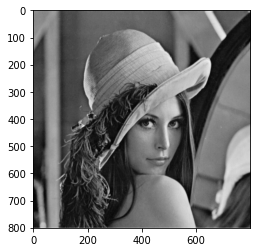

In [175]:
plt.imshow(image, cmap='gray')

•Primo problema: come visualizziamo numeri complessi?

In [177]:
image.shape

(801, 800)

In [166]:
fft_complex_image = np.fft.fft2(image)
print(fft_complex_image)

[[ 6.69606590e+07      +0.j         -1.08770706e+06+6091075.17843108j
   3.70295336e+06-2757047.28955987j ... -3.95439103e+05-1560506.31328989j
   3.70295336e+06+2757047.28955987j -1.08770706e+06-6091075.17843108j]
 [-1.07370499e+05-2849432.44355249j -3.43869421e+06+3949817.10550193j
  -2.70902306e+06 +126564.83748603j ...  1.49816812e+06+2213245.6303647j
  -8.51491762e+05+1051623.14311064j -1.78699080e+04+2468260.76122042j]
 [-1.16829650e+06 -274842.34877169j -6.91603815e+05 -556376.72810382j
   1.65781089e+06-1331403.75185979j ...  8.25478274e+05+2337698.02123952j
  -1.99479883e+06 -643107.6975126j   2.01384641e+06 -151929.91903933j]
 ...
 [ 1.29532131e+06 -641207.71777444j  1.89107677e+06+1803646.91040486j
  -1.39203507e+06 -376620.98895864j ...  2.49591569e+06 +338867.29750253j
   3.27269151e+05-1533922.70812678j -2.38847813e+04+1502893.96828975j]
 [-1.16829650e+06 +274842.34877169j  2.01384641e+06 +151929.91903933j
  -1.99479883e+06 +643107.6975126j  ... -1.09129383e+06-1713041.97

Possiamo utilizzare il modulo, ma bisogna ricordare che
questa operazione è lecita solo per la visualizzazione e non
per i calcoli

L’immagine del modulo della trasformata “sembra” tutta nulla

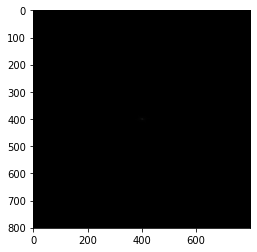

In [182]:
plt.imshow(((np.abs(np.fft.fftshift(np.fft.fft2(image))))), cmap='gray')

In [184]:
np.min(np.abs(np.fft.fftshift(np.fft.fft2(image))))

2.278161286825897

In [183]:
np.max(np.abs(np.fft.fftshift(np.fft.fft2(image))))

66960659.0

c’e’ un valore nel primo elemento della matrice che satura tutta la
rappresentazione dell’immagine trasformata. A che cosa corrisponde questo
valore?

In [ ]:
print("min val:", np.min(np.abs(fft_complex_image)))
print("max val:", np.max(np.abs(fft_complex_image)))

min val: 2.278161286825897
max val: 66960659.0


Quindi dobbiamo utilizzare una scala di grigi non lineare, per esempio visualizzando
il logaritmo della trasformata

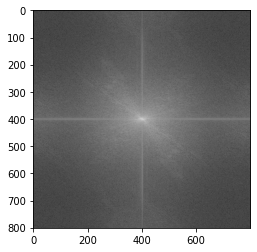

In [198]:
plt.imshow(1*np.log(1+np.abs(np.fft.fftshift(np.fft.fft2(image)))), cmap='gray')

Quando si visualizza lo spettro di Fourier come immagine di intensità, esso
manifesta in genere una dinamica molto più grande di quella riproducibile
su un tipico display, per cui solo le parti più luminose dello spettro
risultano visibili.
Per esempio, lo spettro dell'immagine di Lena varia tra 0 (circa) e
6.47x106
. Effettuando la normalizzazione necessaria per visualizzarlo con
L=256 livelli di grigio, solo pochissime parti molto luminose sono visibili.
A ciò si può ovviare, come è noto, mediante una compressione di tipo
logaritmico, visualizzando, invece che lo spettro, una funzione del tipo:
D(u,v)=c log(1+ |F(u,v)|)
c è una costante di scala, che va scelta opportunamente per far ricadere i
valori trasformati nel range voluto, cioè in [0, L-1]


In [194]:
print(np.where(np.abs(fft_complex_image)==66960659.0))

(array([0]), array([0]))


In [195]:
fft_shifted_complex = (np.fft.fftshift(fft_complex_image))

In [196]:
np.where(fft_shifted_complex==66960659.0)

(array([400]), array([400]))

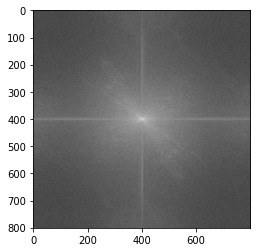

In [171]:
plt.imshow(1+np.log((np.abs(np.fft.fftshift(np.fft.fft2(image))))), cmap='gray')

Un esempio di trasformata di immagine reale (256x256 pixel, 256 livelli).
L’informazione associata alla fase è in realtà molto più importante di quanto non
appaia da questo esempio. Nello spazio di Fourier è come se l’immagine fosse
osservata da un differente punto di vista: ogni punto nel dominio trasformato contiene
due pezzi di informazione, uno relativo alla ampiezza e uno relativo alla fase di una
struttura periodica. La fase contiene l’informazione essenziale per la struttura
dell’immagine, quella cioè relativa al dove le strutture periodiche evidenziate nella
DFT sono collocate. L’ampiezza, invece, contiene solo l’informazione relativa al fatto
che una certa struttura periodica è presente nell’immagine. La visualizzazione dello
spettro riguarda in realtà una versione compressa logaritmicamente di |F(u,v)|.

Che vantaggio si può ottenere dalla trasformata di Fourier?
 Nello spazio delle frequenze è possibile:
 sopprimere frequenze indesiderate
 ridurre lo spazio occupato dai dati pur limitando la degenerazione
del segnale (JPEG, MPEG, DivX, MP3)
 rigenerare segnali degradati

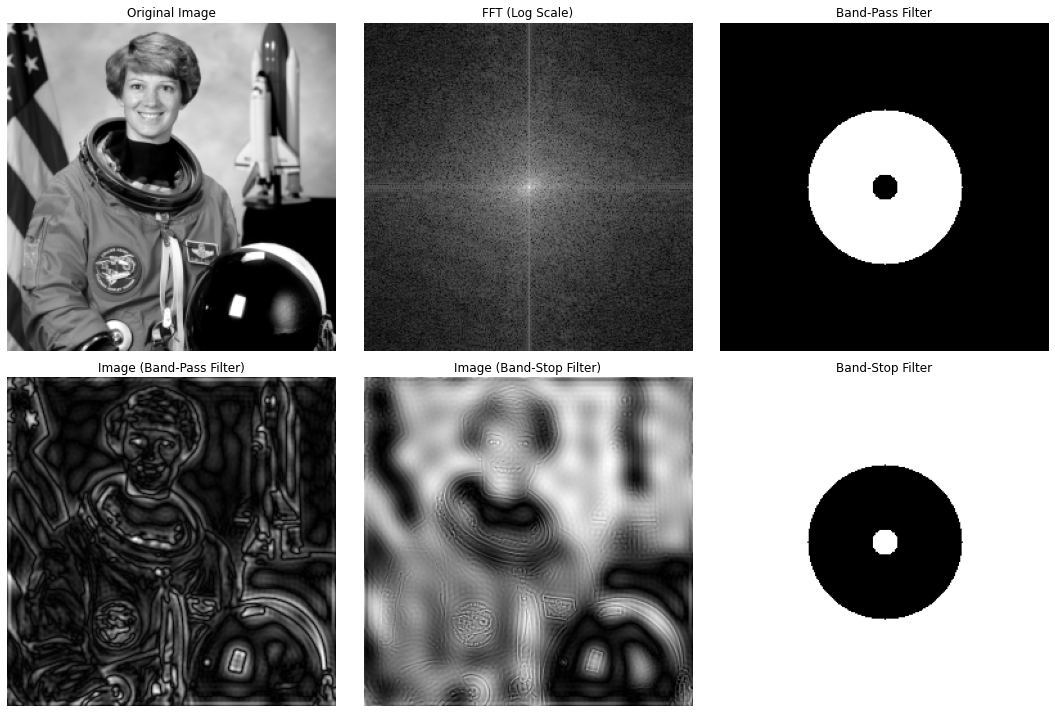

In [203]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color
from skimage.transform import resize
from scipy.fftpack import fftshift, fft2, ifft2

# Funzione per creare un filtro passa banda
def band_pass_filter(shape, low_radius, high_radius):
    rows, cols = shape
    center_row, center_col = rows // 2, cols // 2
    Y, X = np.ogrid[:rows, :cols]
    distance = np.sqrt((X - center_col)**2 + (Y - center_row)**2)
    mask = (distance >= low_radius) & (distance <= high_radius)
    return mask

# Funzione per creare un filtro blocca banda
def band_stop_filter(shape, low_radius, high_radius):
    return ~band_pass_filter(shape, low_radius, high_radius)

# Caricamento immagine e preparazione
image = color.rgb2gray(data.astronaut())
image = resize(image, (256, 256))  # Ridimensiona per semplicità
image_fft = fft2(image)
image_fft_shifted = fftshift(image_fft)  # Shift per portare lo zero al centro

# Parametri del filtro
low_radius = 10
high_radius = 60

# Creazione dei filtri
pass_band = band_pass_filter(image.shape, low_radius, high_radius)
stop_band = band_stop_filter(image.shape, low_radius, high_radius)

# Applicazione dei filtri nel dominio di Fourier
filtered_fft_pass = image_fft_shifted * pass_band
filtered_fft_stop = image_fft_shifted * stop_band

# Inverse FFT per ottenere le immagini filtrate
image_filtered_pass = np.abs(ifft2(fftshift(filtered_fft_pass)))
image_filtered_stop = np.abs(ifft2(fftshift(filtered_fft_stop)))

# Visualizzazione dei risultati
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes[0, 0].imshow(image, cmap='gray')
axes[0, 0].set_title("Original Image")
axes[0, 1].imshow(np.log1p(np.abs(image_fft_shifted)), cmap='gray')
axes[0, 1].set_title("FFT (Log Scale)")
axes[0, 2].imshow(pass_band, cmap='gray')
axes[0, 2].set_title("Band-Pass Filter")

axes[1, 0].imshow(image_filtered_pass, cmap='gray')
axes[1, 0].set_title("Image (Band-Pass Filter)")
axes[1, 1].imshow(image_filtered_stop, cmap='gray')
axes[1, 1].set_title("Image (Band-Stop Filter)")
axes[1, 2].imshow(stop_band, cmap='gray')
axes[1, 2].set_title("Band-Stop Filter")

for ax in axes.flat:
    ax.axis("off")

plt.tight_layout()
plt.show()


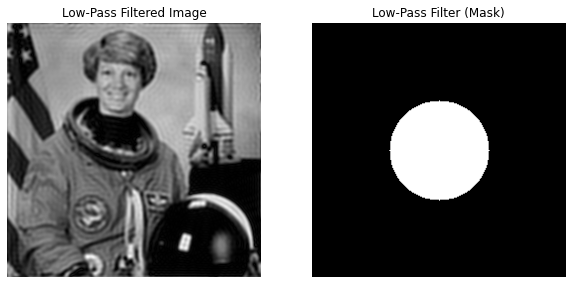

In [204]:
def low_pass_filter(shape, radius):
    rows, cols = shape
    center_row, center_col = rows // 2, cols // 2
    Y, X = np.ogrid[:rows, :cols]
    distance = np.sqrt((X - center_col)**2 + (Y - center_row)**2)
    mask = distance <= radius
    return mask

# Creazione e applicazione del filtro passa basso
low_pass = low_pass_filter(image.shape, 50)
filtered_fft_low = image_fft_shifted * low_pass
image_filtered_low = np.abs(ifft2(fftshift(filtered_fft_low)))

# Visualizzazione
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Low-Pass Filtered Image")
plt.imshow(image_filtered_low, cmap='gray')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Low-Pass Filter (Mask)")
plt.imshow(low_pass, cmap='gray')
plt.axis("off")
plt.show()



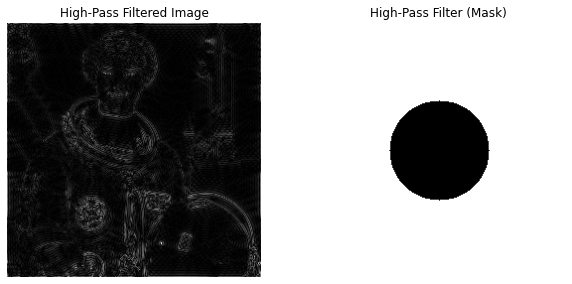

In [205]:
def high_pass_filter(shape, radius):
    rows, cols = shape
    center_row, center_col = rows // 2, cols // 2
    Y, X = np.ogrid[:rows, :cols]
    distance = np.sqrt((X - center_col)**2 + (Y - center_row)**2)
    mask = distance > radius
    return mask

# Creazione e applicazione del filtro passa alto
high_pass = high_pass_filter(image.shape, 50)
filtered_fft_high = image_fft_shifted * high_pass
image_filtered_high = np.abs(ifft2(fftshift(filtered_fft_high)))

# Visualizzazione
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("High-Pass Filtered Image")
plt.imshow(image_filtered_high, cmap='gray')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("High-Pass Filter (Mask)")
plt.imshow(high_pass, cmap='gray')
plt.axis("off")
plt.show()


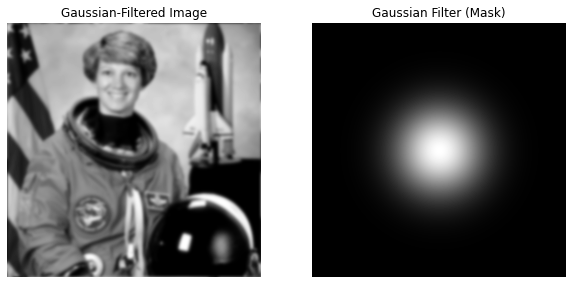

In [206]:
def gaussian_low_pass_filter(shape, sigma):
    rows, cols = shape
    center_row, center_col = rows // 2, cols // 2
    Y, X = np.ogrid[:rows, :cols]
    distance = np.sqrt((X - center_col)**2 + (Y - center_row)**2)
    gaussian_mask = np.exp(-(distance**2) / (2 * (sigma**2)))
    return gaussian_mask

# Creazione e applicazione del filtro gaussiano
gaussian_filter = gaussian_low_pass_filter(image.shape, sigma=30)
filtered_fft_gaussian = image_fft_shifted * gaussian_filter
image_filtered_gaussian = np.abs(ifft2(fftshift(filtered_fft_gaussian)))

# Visualizzazioneaaa
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Gaussian-Filtered Image")
plt.imshow(image_filtered_gaussian, cmap='gray')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Gaussian Filter (Mask)")
plt.imshow(gaussian_filter, cmap='gray')
plt.axis("off")
plt.show()


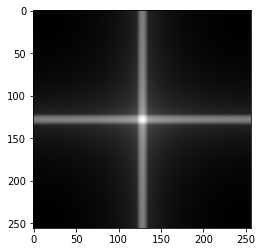

In [140]:
plt.imshow(1+np.log(np.abs(np.fft.fftshift(np.fft.fft2(gaussian_filter)))), cmap='gray')

In [ ]:
gfp =np.abs(np.fft.fftshift(np.fft.fft2(gaussian_filter)))

In [208]:
from scipy.signal import convolve2d

convoluzione_ds = convolve2d(image, gfp, mode='same') 

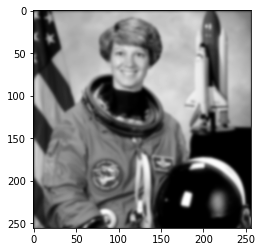

In [209]:
plt.imshow(convoluzione_ds, cmap='gray')

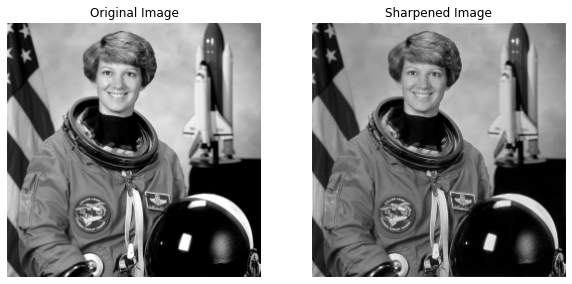

In [210]:
# Creazione del filtro passa alto per sharpening
high_pass_sharp = high_pass_filter(image.shape, 50)
filtered_fft_sharp = image_fft_shifted * high_pass_sharp
image_filtered_sharp = np.abs(ifft2(fftshift(filtered_fft_sharp)))

# Creazione immagine sharpened (originale + filtro passa alto)
sharpened_image = image + 0.5 * image_filtered_sharp

# Visualizzazione
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Sharpened Image")
plt.imshow(sharpened_image, cmap='gray')
plt.axis("off")
plt.show()


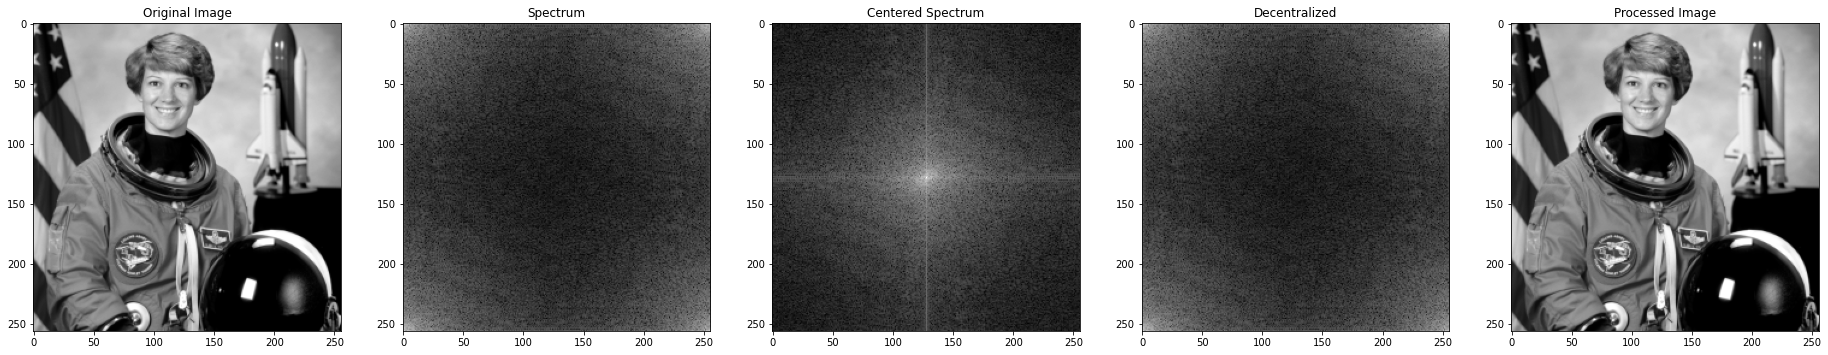

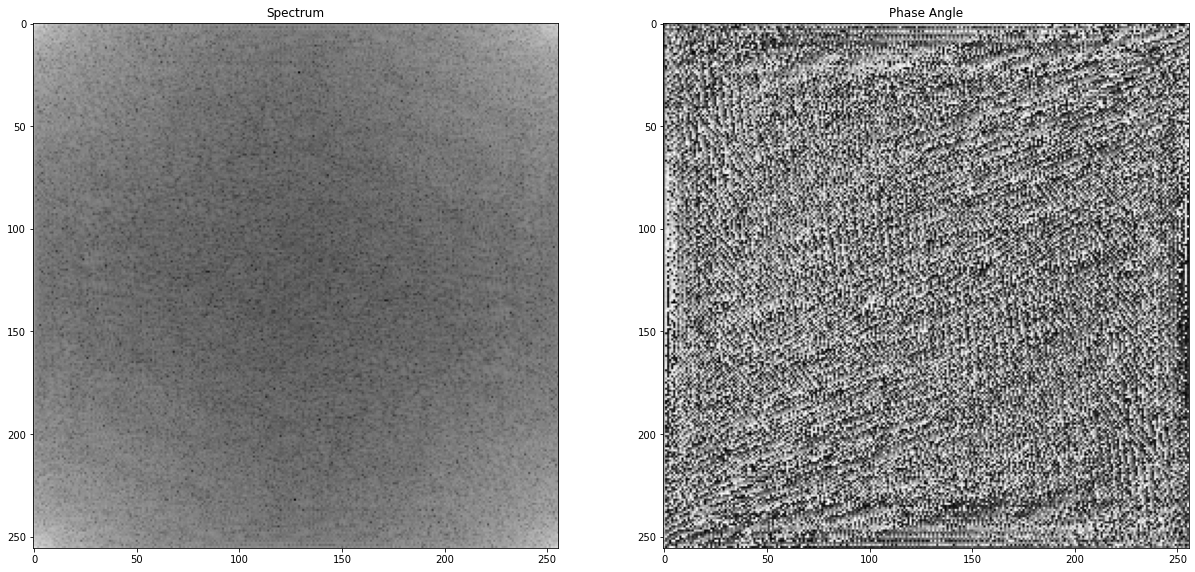

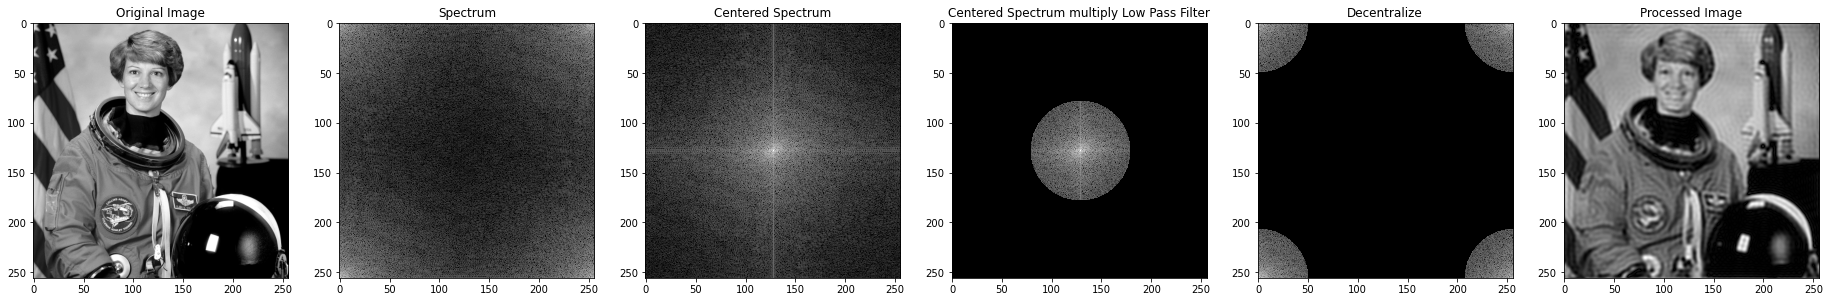

In [211]:

# Importing libraries

import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from math import exp

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

# Load an image
img_c1 = image

# Perform Fourier Transform
img_c2 = np.fft.fft2(img_c1)

# Shift the zero frequency component to the center
img_c3 = np.fft.fftshift(img_c2)

# Shift back to original position
img_c4 = np.fft.ifftshift(img_c3)

# Inverse Fourier Transform
img_c5 = np.fft.ifft2(img_c4)

# Plotting
plt.subplot(151), plt.imshow(img_c1, "gray"), plt.title("Original Image")
plt.subplot(152), plt.imshow(np.log(1+np.abs(img_c2)), "gray"), plt.title("Spectrum")
plt.subplot(153), plt.imshow(np.log(1+np.abs(img_c3)), "gray"), plt.title("Centered Spectrum")
plt.subplot(154), plt.imshow(np.log(1+np.abs(img_c4)), "gray"), plt.title("Decentralized")
plt.subplot(155), plt.imshow(np.abs(img_c5), "gray"), plt.title("Processed Image")

plt.show()

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

# Load another image
img = image

# Perform Fourier Transform
original = np.fft.fft2(img)

# Plotting spectrum and phase angle
plt.subplot(131), plt.imshow(np.log(np.abs(original)), "gray"), plt.title("Spectrum")
plt.subplot(132), plt.imshow(np.angle(original), "gray"), plt.title("Phase Angle")
plt.show()

# Function to calculate distance between two points
def distance(point1,point2):
    return sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

# Ideal low-pass filter function
def idealFilterLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 1
    return base

# Ideal high-pass filter function
def idealFilterHP(D0,imgShape):
    base = np.ones(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 0
    return base

# Butterworth low-pass filter function
def butterworthLP(D0,imgShape,n):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1/(1+(distance((y,x),center)/D0)**(2*n))
    return base

# Butterworth high-pass filter function
def butterworthHP(D0,imgShape,n):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1-1/(1+(distance((y,x),center)/D0)**(2*n))
    return base

# Gaussian low-pass filter function
def gaussianLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

# Gaussian high-pass filter function
def gaussianHP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1 - exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

# Applying low-pass filter on the image
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
plt.subplot(161), plt.imshow(img, "gray"), plt.title("Original Image")
plt.subplot(162), plt.imshow(np.log(1+np.abs(original)), "gray"), plt.title("Spectrum")
center = np.fft.fftshift(original)
plt.subplot(163), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Centered Spectrum")
LowPassCenter = center * idealFilterLP(50,img.shape)
plt.subplot(164), plt.imshow(np.log(1+np.abs(LowPassCenter)), "gray"), plt.title("Centered Spectrum multiply Low Pass Filter")
LowPass = np.fft.ifftshift(LowPassCenter)
plt.subplot(165), plt.imshow(np.log(1+np.abs(LowPass)), "gray"), plt.title("Decentralize")
inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(166), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Processed Image")
plt.show()


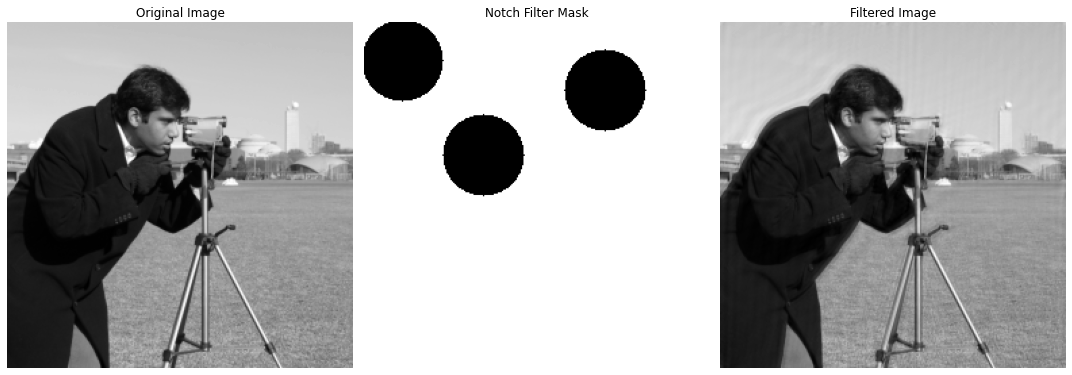

In [213]:
def notch_filter(shape, center, radius):
    """
    Crea un filtro Notch centrato su una determinata frequenza.
    
    Args:
        shape (tuple): Dimensioni dell'immagine (rows, cols).
        center (tuple): Coordinate del centro della frequenza da sopprimere.
        radius (int): Raggio della banda da sopprimere.
    
    Returns:
        numpy.ndarray: Maschera del filtro Notch.
    """
    rows, cols = shape
    center_row, center_col = center
    Y, X = np.ogrid[:rows, :cols]
    distance = np.sqrt((X - center_col)**2 + (Y - center_row)**2)
    mask = distance > radius
    return mask

def apply_notch_filter(image, centers, radius):
    """
    Applica un filtro Notch a un'immagine, rimuovendo frequenze specifiche.
    
    Args:
        image (numpy.ndarray): Immagine in input (2D).
        centers (list): Lista di coordinate (row, col) delle frequenze da sopprimere.
        radius (int): Raggio delle bande da sopprimere.
    
    Returns:
        numpy.ndarray: Immagine filtrata.
    """
    # Trasformata di Fourier
    image_fft = fft2(image)
    image_fft_shifted = fftshift(image_fft)
    
    # Creazione del filtro Notch (inizialmente tutti i valori sono 1)
    notch_mask = np.ones_like(image, dtype=float)
    
    # Applicazione dei notch per ciascun centro specificato
    for center in centers:
        notch_mask *= notch_filter(image.shape, center, radius)
    
    # Applicazione del filtro e trasformata inversa
    filtered_fft = image_fft_shifted * (notch_mask)
    filtered_image = np.abs(ifft2(fftshift(filtered_fft)))
    
    return filtered_image, notch_mask

# Caricamento immagine e impostazione parametri
image = (data.camera())  # Immagine di esempio
image = resize(image, (256, 256))     # Ridimensiona per semplicità

# Specifica dei centri di interferenza nel dominio delle frequenze
centers = [( 50, 128 + 50), (128 - 30, 128 - 40), (128 - 100, 128 - 100)]  # Frequenze da sopprimere
radius = 30  # Raggio del filtro Notch

# Applicazione del filtro Notch
filtered_image, notch_mask = apply_notch_filter(image, centers, radius)

# Visualizzazione dei risultati
plt.figure(figsize=(15, 7))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Notch Filter Mask")
plt.imshow(notch_mask, cmap='gray')
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Filtered Image")
plt.imshow(filtered_image, cmap='gray')
plt.axis("off")

plt.tight_layout()
plt.show()


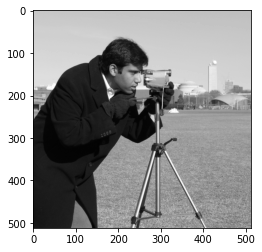

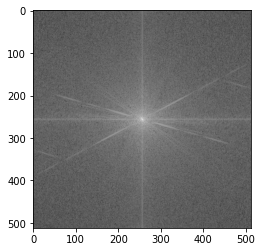

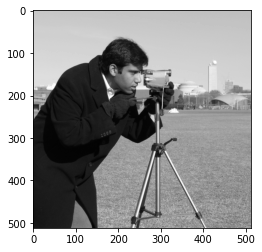

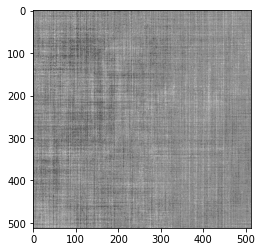

In [114]:
complex_kspace_image = np.fft.fft2(data.camera())
fftshift_kspace = np.fft.fftshift(complex_kspace_image)
plt.imshow(data.camera(), cmap='gray')
plt.show()
plt.imshow(np.log(np.abs(fftshift_kspace)), cmap='gray')
plt.show()
ifft_image = np.fft.ifft2(np.fft.ifftshift(fftshift_kspace))
plt.imshow((np.abs(ifft_image)), cmap='gray')

ifft_image = np.fft.ifft2(np.fft.ifftshift(fftshift_kspace))
plt.imshow((np.abs(ifft_image)), cmap='gray')

plt.show()

plt.imshow(data.camera()-np.abs(ifft_image), cmap='gray')

altri esempi: https://person.dibris.unige.it/boccacci-patrizia/esi/DFT-2DImmagini.pdf